In [1]:
import pandas as pd

In [5]:
File = "accident_prediction_india.csv"

In [6]:
india = pd.read_csv(File)


In [7]:
india.head() 


,State Name,City Name,Year,Month,Day of Week,Time of Day,Accident Severity,Number of Vehicles Involved,Vehicle Type Involved,Number of Casualties,...,Road Type,Road Condition,Lighting Conditions,Traffic Control Presence,Speed Limit (km/h),Driver Age,Driver Gender,Driver License Status,Alcohol Involvement,Accident Location Details
0,Jammu and Kashmir,Unknown,2021,May,Monday,1:46,Serious,5,Cycle,0,...,National Highway,Wet,Dark,Signs,61,66,Male,NaN,Yes,Curve
1,Uttar Pradesh,Lucknow,2018,January,Wednesday,21:30,Minor,5,Truck,5,...,Urban Road,Dry,Dusk,Signs,92,60,Male,NaN,Yes,Straight Road
2,Chhattisgarh,Unknown,2023,May,Wednesday,5:37,Minor,5,Pedestrian,6,...,National Highway,Under Construction,Dawn,Signs,120,26,Female,NaN,No,Bridge
3,Uttar Pradesh,Lucknow,2020,June,Saturday,0:31,Minor,3,Bus,10,...,State Highway,Dry,Dark,Signals,76,34,Female,Valid,Yes,Straight Road
4,Sikkim,Unknown,2021,August,Thursday,11:21,Minor,5,Cycle,7,...,Urban Road,Wet,Dusk,Signs,115,30,Male,NaN,No,Intersection


In [8]:
india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   3000 non-null   object
 1   City Name                    3000 non-null   object
 2   Year                         3000 non-null   int64 
 3   Month                        3000 non-null   object
 4   Day of Week                  3000 non-null   object
 5   Time of Day                  3000 non-null   object
 6   Accident Severity            3000 non-null   object
 7   Number of Vehicles Involved  3000 non-null   int64 
 8   Vehicle Type Involved        3000 non-null   object
 9   Number of Casualties         3000 non-null   int64 
 10  Number of Fatalities         3000 non-null   int64 
 11  Weather Conditions           3000 non-null   object
 12  Road Type                    3000 non-null   object
 13  Road Condition               3000

In [9]:
df_clean = india.copy()

In [10]:
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(' ', '_')
df_clean['time_of_day'] = pd.to_datetime(df_clean['time_of_day'], errors='coerce')
df_clean['hour'] = df_clean['time_of_day'].dt.hour
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].str.strip().str.lower()

df_clean = df_clean.drop_duplicates()

missing_values = df_clean.isnull().sum()

df_clean = df_clean.dropna(subset=['time_of_day', 'hour'])

categorical_cols = ['state_name', 'city_name', 'month', 'day_of_week', 'accident_severity',
                    'vehicle_type_involved', 'weather_conditions', 'road_type',
                    'road_condition', 'lighting_conditions', 'traffic_control_presence',
                    'driver_gender', 'driver_license_status', 'alcohol_involvement',
                    'accident_location_details']
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category')


C:\Users\SAMUEL NURUDEEN TARI\AppData\Local\Temp\ipykernel_5552\2019889783.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['time_of_day'] = pd.to_datetime(df_clean['time_of_day'], errors='coerce')


In [12]:
df_clean_info = df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2506 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   state_name                   2506 non-null   category      
 1   city_name                    2506 non-null   category      
 2   year                         2506 non-null   int64         
 3   month                        2506 non-null   category      
 4   day_of_week                  2506 non-null   category      
 5   time_of_day                  2506 non-null   datetime64[ns]
 6   accident_severity            2506 non-null   category      
 7   number_of_vehicles_involved  2506 non-null   int64         
 8   vehicle_type_involved        2506 non-null   category      
 9   number_of_casualties         2506 non-null   int64         
 10  number_of_fatalities         2506 non-null   int64         
 11  weather_conditions           2506 non-null   cat

In [13]:
india = df_clean.head()

In [14]:
india

,state_name,city_name,year,month,day_of_week,time_of_day,accident_severity,number_of_vehicles_involved,vehicle_type_involved,number_of_casualties,...,road_condition,lighting_conditions,traffic_control_presence,speed_limit_(km/h),driver_age,driver_gender,driver_license_status,alcohol_involvement,accident_location_details,hour
0,jammu and kashmir,unknown,2021,may,monday,2025-04-16 01:46:00,serious,5,cycle,0,...,wet,dark,signs,61,66,male,NaN,yes,curve,1.0
1,uttar pradesh,lucknow,2018,january,wednesday,2025-04-16 21:30:00,minor,5,truck,5,...,dry,dusk,signs,92,60,male,NaN,yes,straight road,21.0
2,chhattisgarh,unknown,2023,may,wednesday,2025-04-16 05:37:00,minor,5,pedestrian,6,...,under construction,dawn,signs,120,26,female,NaN,no,bridge,5.0
3,uttar pradesh,lucknow,2020,june,saturday,2025-04-16 00:31:00,minor,3,bus,10,...,dry,dark,signals,76,34,female,valid,yes,straight road,0.0
4,sikkim,unknown,2021,august,thursday,2025-04-16 11:21:00,minor,5,cycle,7,...,wet,dusk,signs,115,30,male,NaN,no,intersection,11.0


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

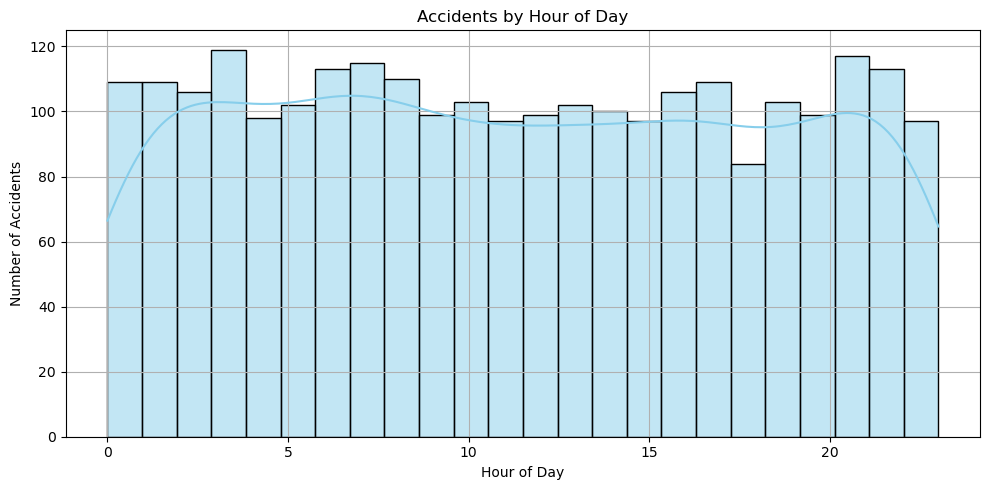

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Accidents by Hour of Day
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['hour'], bins=24, kde=True, color='skyblue')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\SAMUEL NURUDEEN TARI\AppData\Local\Temp\ipykernel_5552\3985034754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='month', order=month_order, palette='viridis')


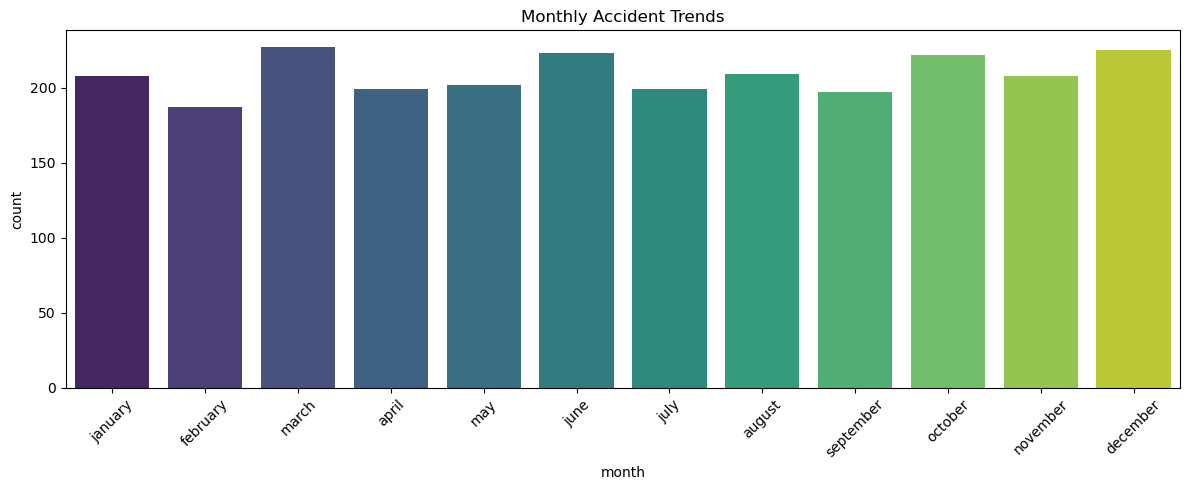

In [20]:
 #Accidents by Month
plt.figure(figsize=(12, 5))
month_order = ['january','february','march','april','may','june','july',
               'august','september','october','november','december']
sns.countplot(data=df_clean, x='month', order=month_order, palette='viridis')
plt.title('Monthly Accident Trends')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\SAMUEL NURUDEEN TARI\AppData\Local\Temp\ipykernel_5552\3076091812.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='day_of_week', order=day_order, palette='coolwarm')


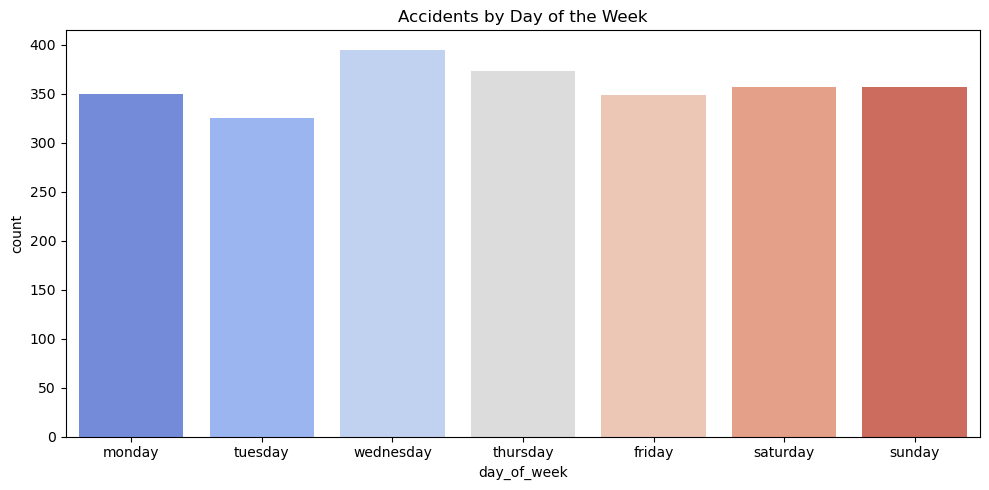

In [21]:
#  Accidents by Day of Week
plt.figure(figsize=(10, 5))
day_order = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
sns.countplot(data=df_clean, x='day_of_week', order=day_order, palette='coolwarm')
plt.title('Accidents by Day of the Week')
plt.tight_layout()
plt.show()

C:\Users\SAMUEL NURUDEEN TARI\AppData\Local\Temp\ipykernel_5552\2912326786.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='magma')


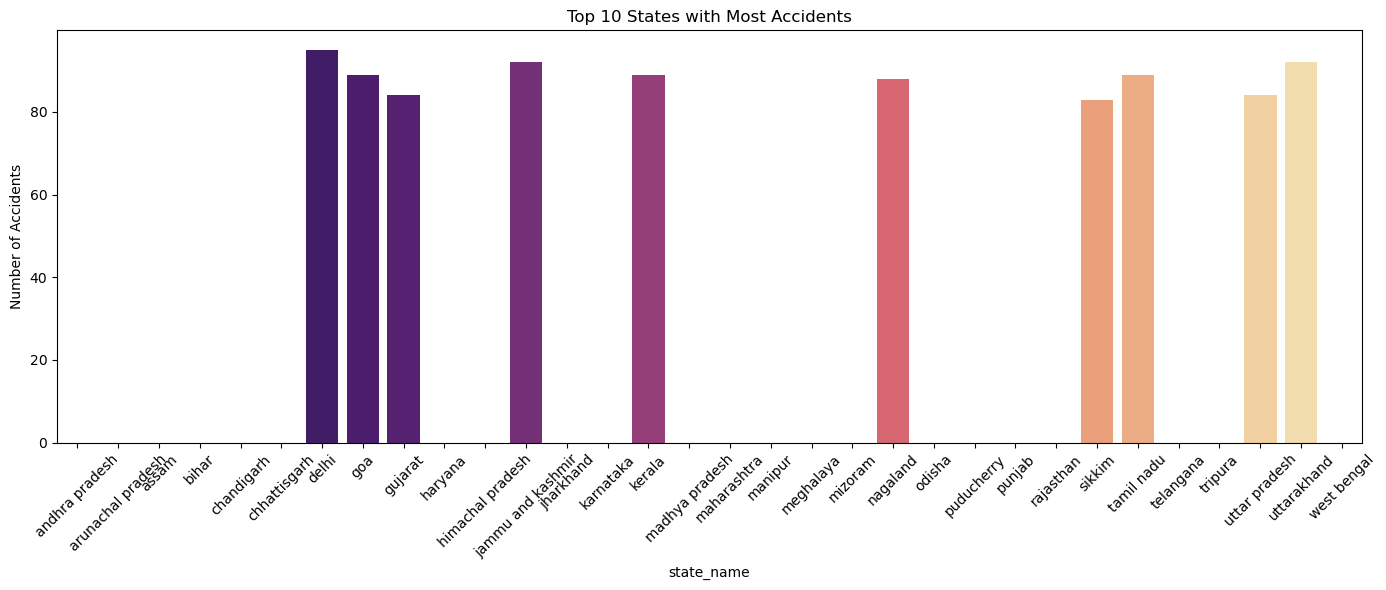

In [22]:
#  Top 10 States with Most Accidents
plt.figure(figsize=(14, 6))
top_states = df_clean['state_name'].value_counts().nlargest(10)
sns.barplot(x=top_states.index, y=top_states.values, palette='magma')
plt.title('Top 10 States with Most Accidents')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


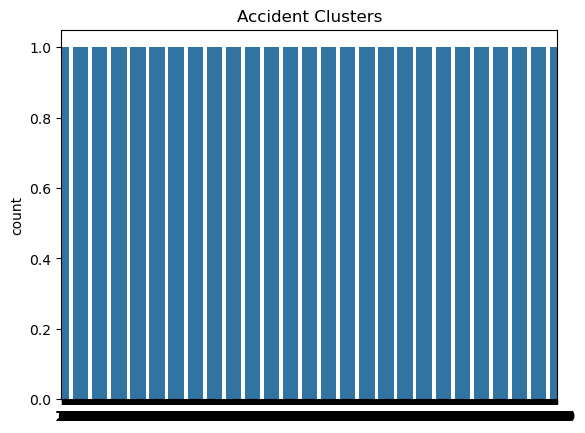

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

df_clean['state_code'] = LabelEncoder().fit_transform(df_clean['state_name'])
df_clean['city_code'] = LabelEncoder().fit_transform(df_clean['city_name'])

X = df_clean[['state_code', 'city_code', 'hour']]

kmeans = KMeans(n_clusters=5, random_state=0)
df_clean['hotspot_cluster'] = kmeans.fit_predict(X)

sns.countplot(df_clean['hotspot_cluster'])
plt.title("Accident Clusters")
plt.show()


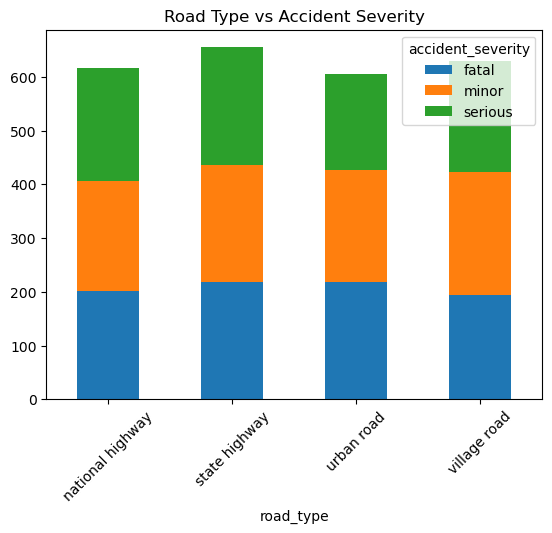

In [24]:

pd.crosstab(df_clean['road_type'], df_clean['accident_severity']).plot(kind='bar', stacked=True)
plt.title("Road Type vs Accident Severity")
plt.xticks(rotation=45)
plt.show()


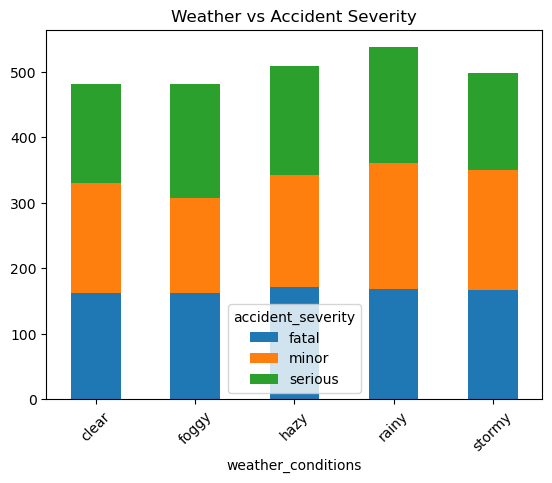

In [28]:
pd.crosstab(df_clean['weather_conditions'], df_clean['accident_severity']).plot(kind='bar', stacked=True)
plt.title("Weather vs Accident Severity")
plt.xticks(rotation=45)
plt.show()



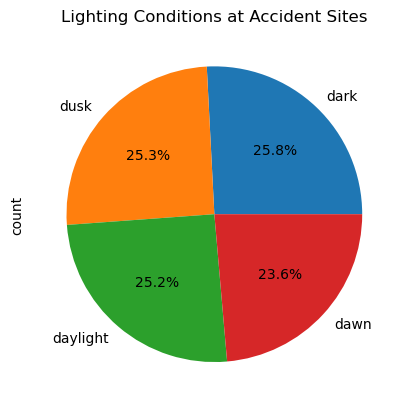

In [26]:
df_clean['lighting_conditions'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Lighting Conditions at Accident Sites")
plt.show()

In [33]:
import pandas as pd

df = pd.read_csv("accident_prediction_india.csv")
print(df.columns)



Index(['State Name', 'City Name', 'Year', 'Month', 'Day of Week',
       'Time of Day', 'Accident Severity', 'Number of Vehicles Involved',
       'Vehicle Type Involved', 'Number of Casualties', 'Number of Fatalities',
       'Weather Conditions', 'Road Type', 'Road Condition',
       'Lighting Conditions', 'Traffic Control Presence', 'Speed Limit (km/h)',
       'Driver Age', 'Driver Gender', 'Driver License Status',
       'Alcohol Involvement', 'Accident Location Details'],
      dtype='object')


C:\Users\SAMUEL NURUDEEN TARI\AppData\Local\Temp\ipykernel_5552\1615668178.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_of_day'] = pd.to_datetime(df['time_of_day'], errors='coerce')
2025-04-16 15:46:58.379 
  command:

    streamlit run C:\Users\SAMUEL NURUDEEN TARI\AppData\Local\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-16 15:47:00.572 Session state does not function when running a script without `streamlit run`


DeltaGenerator()

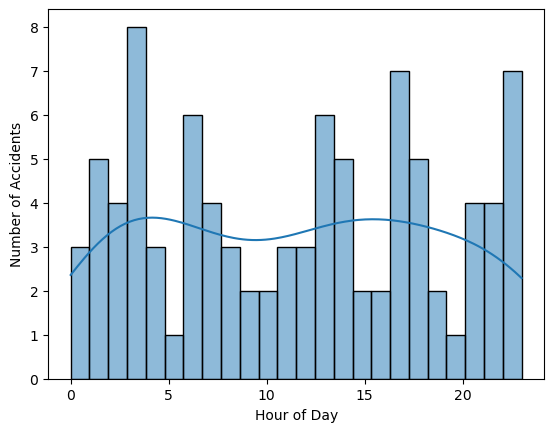

In [34]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv("accident_prediction_india.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert time column and extract hour
df['time_of_day'] = pd.to_datetime(df['time_of_day'], errors='coerce')
df['hour'] = df['time_of_day'].dt.hour

# Streamlit UI
st.title("India Road Accident Dashboard")
st.sidebar.header("Filters")

state_filter = st.sidebar.selectbox("Select State", df['state_name'].dropna().unique())
filtered = df[df['state_name'] == state_filter]

# Accident Trends by Hour
st.subheader(f"Accident Trends in {state_filter}")
fig, ax = plt.subplots()
sns.histplot(filtered['hour'], bins=24, kde=True, ax=ax)
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Accidents")
st.pyplot(fig)


In [36]:

df_clean['severity_code'] = LabelEncoder().fit_transform(df_clean['accident_severity'])

features = ['hour', 'state_code', 'city_code']
X = df_clean[features]
y = df_clean['severity_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.36      0.43      0.39       160
           1       0.42      0.40      0.41       176
           2       0.29      0.25      0.27       166

    accuracy                           0.36       502
   macro avg       0.36      0.36      0.35       502
weighted avg       0.36      0.36      0.36       502



C:\Users\SAMUEL NURUDEEN TARI\AppData\Local\Temp\ipykernel_5552\3763922267.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location_accidents = df_clean.groupby(['state_name', 'city_name']).size().reset_index(name='accident_count')


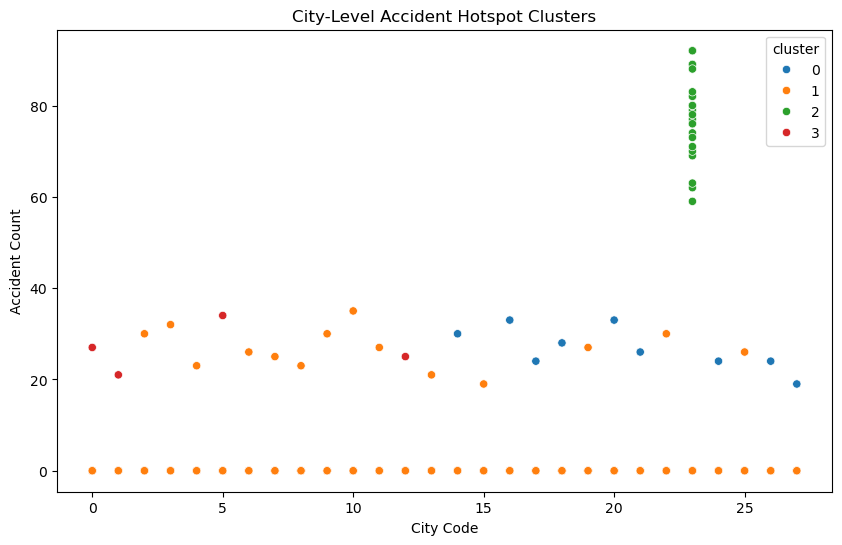

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

location_accidents = df_clean.groupby(['state_name', 'city_name']).size().reset_index(name='accident_count')

from sklearn.preprocessing import LabelEncoder
location_accidents['state_code'] = LabelEncoder().fit_transform(location_accidents['state_name'])
location_accidents['city_code'] = LabelEncoder().fit_transform(location_accidents['city_name'])


X = location_accidents[['state_code', 'city_code', 'accident_count']]

kmeans = KMeans(n_clusters=4, random_state=42)
location_accidents['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=location_accidents, 
    x='city_code', y='accident_count', 
    hue='cluster', palette='tab10'
)
plt.title('City-Level Accident Hotspot Clusters')
plt.xlabel("City Code")
plt.ylabel("Accident Count")
plt.show()


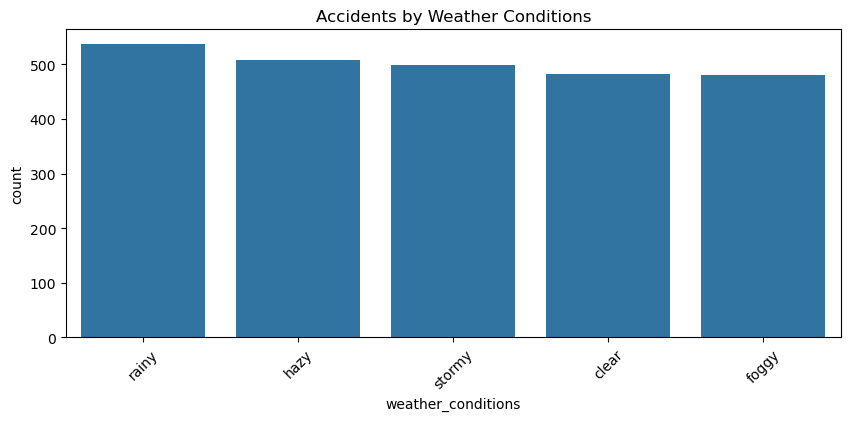

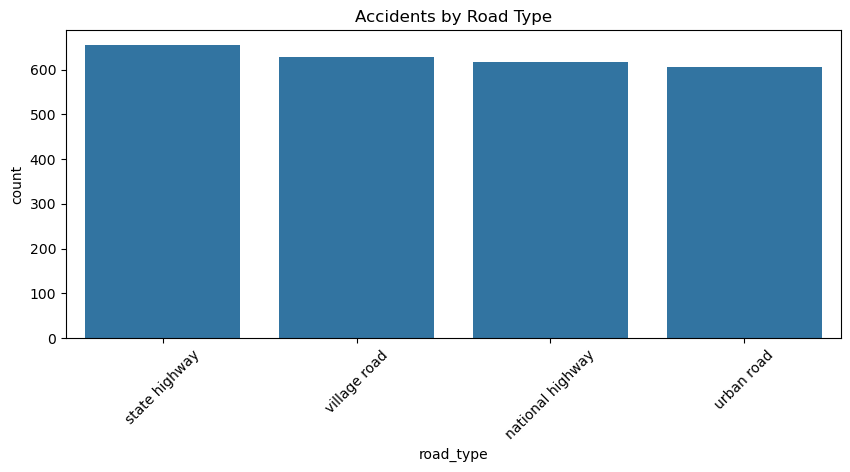

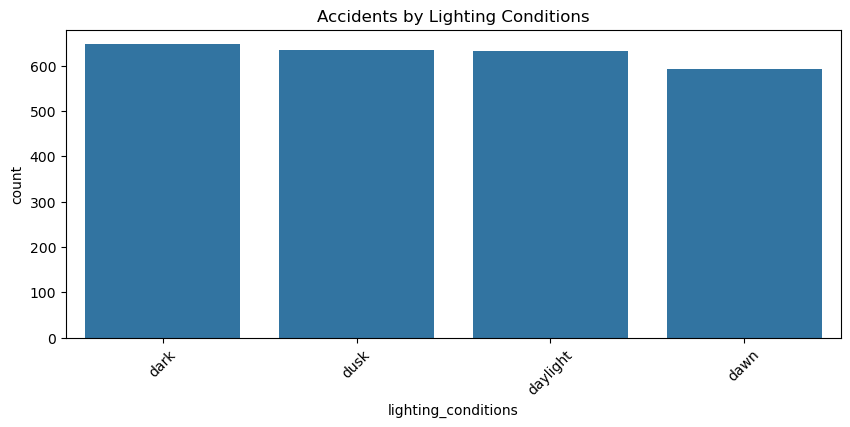

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Weather Conditions
plt.figure(figsize=(10, 4))
sns.countplot(data=df_clean, x='weather_conditions', order=df_clean['weather_conditions'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Accidents by Weather Conditions")
plt.show()

# Road Type
plt.figure(figsize=(10, 4))
sns.countplot(data=df_clean, x='road_type', order=df_clean['road_type'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Accidents by Road Type")
plt.show()

# Lighting Conditions
plt.figure(figsize=(10, 4))
sns.countplot(data=df_clean, x='lighting_conditions', order=df_clean['lighting_conditions'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Accidents by Lighting Conditions")
plt.show()
